In [1]:
from train import CarNumbersDataset
import numpy as np
import albumentations as A
from albumentations.pytorch import ToTensorV2
import torch
import torchsummary

import matplotlib.pyplot as plt

In [2]:
dataset = CarNumbersDataset('../dataset/classification/train.csv')
mean, std = dataset.calculate_mean_and_std()
print(mean, std)

train_transform = A.Compose([
    A.LongestMaxSize(max_size=224),
    A.Normalize(mean=mean, std=std),
    ToTensorV2(),
])
dataset = CarNumbersDataset('../dataset/classification/train.csv', transform=train_transform)

tensor([0.5271, 0.5139, 0.5209]) tensor([0.1992, 0.1983, 0.1935])


In [3]:
model = torch.hub.load('pytorch/vision:v0.10.0', 'mobilenet_v2', pretrained=True)

Using cache found in C:\Users\uvd20/.cache\torch\hub\pytorch_vision_v0.10.0
C:\Users\uvd20\.virtualenvs\YSDA-Labelling-Course-Project-Round-1\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
C:\Users\uvd20\.virtualenvs\YSDA-Labelling-Course-Project-Round-1\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [7]:
dataset[0][0]

tensor([[[ 2.8745e-01,  3.6620e-01,  5.6308e-01,  ...,  2.0869e-01,
           2.2838e-01,  2.2838e-01],
         [ 6.0246e-01,  1.0159e+00,  1.7247e+00,  ...,  2.0869e-01,
           2.0869e-01,  2.0869e-01],
         [ 9.9623e-01,  1.4884e+00,  1.8625e+00,  ...,  1.8900e-01,
           1.8900e-01,  1.8900e-01],
         ...,
         [ 3.0713e-01,  2.2838e-01,  9.0562e-02,  ..., -8.6633e-02,
          -7.8798e-03,  7.0874e-02],
         [ 3.4651e-01,  2.8745e-01,  2.4807e-01,  ..., -3.2289e-01,
          -2.6383e-01, -2.4414e-01],
         [ 4.4495e-01,  4.0558e-01,  3.6620e-01,  ..., -7.9542e-01,
          -1.2286e+00, -1.2876e+00]],

        [[ 2.9556e-01,  3.1534e-01,  4.7358e-01,  ..., -1.1321e-03,
          -1.1321e-03, -1.1321e-03],
         [ 6.3182e-01,  9.2852e-01,  1.5219e+00,  ..., -1.1321e-03,
          -1.1321e-03, -1.1321e-03],
         [ 9.0874e-01,  1.3439e+00,  1.6801e+00,  ..., -2.0912e-02,
          -2.0912e-02, -2.0912e-02],
         ...,
         [-6.0471e-02, -1

TypeError: Invalid shape (3, 48, 224) for image data

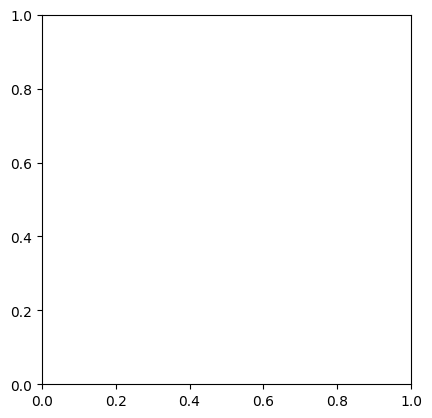

In [5]:
index = 10

plt.imshow(dataset[index][0].numpy().astype(np.uint8))
plt.show()

In [ ]:
dataset[0][0].float().std(dim=(1, 2))